# Line Chart of State Level COVID-19 data
#### Ian Mac Moore, github @zenfinity, 4/24/20
We wanted to see if over the course of the pandemic, there was a relation between testing and cases reported.
## Process
Again used the CSV generated from API call.
### Initialize notebook with imports

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import json
import requests
import gmaps
import os
import sys

# API keys file load location
sys.path.insert(0, "/Users/rober/Desktop/ClassHomework/keys")
# Ian's
#sys.path.insert(0, "/Users/ianmacmoore/Desktop/ClassHomework/keys")

from api_keys import g_key
gmaps.configure(api_key=g_key)
g_key

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

### Get main data from csv and massage

In [2]:
#COV_Tracking_MN_History_data='../Output_Data/COV_Tracking_MN_History_data.csv'
COV_Tracking_MN_History_data = "%s_%s.%s" % ("Output_Data/COV_Tracking_MN_History_data", _getToday() ,"csv")
historyMN_df=pd.read_csv(COV_Tracking_MN_History_data)

# Ian's code...
#historyMN_df = pd.read_csv("../Output_Data/COV_Tracking_MN_History_data_20200422.csv")

historyMN_df.head()

,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
0,20200424,MN,3185,50602,1594.0,2020-04-24T20:00:00Z,221.0,756.0,53787,21.0,44.0,1996.0,243.0,2239.0
1,20200423,MN,2942,48606,1536.0,2020-04-23T20:00:00Z,200.0,712.0,51548,21.0,52.0,1983.0,221.0,2204.0
2,20200422,MN,2721,46623,1317.0,2020-04-22T20:00:00Z,179.0,660.0,49344,19.0,31.0,1493.0,154.0,1647.0
3,20200421,MN,2567,45130,1254.0,2020-04-21T20:00:00Z,160.0,629.0,47697,17.0,27.0,750.0,97.0,847.0
4,20200420,MN,2470,44380,1202.0,2020-04-20T20:00:00Z,143.0,602.0,46850,9.0,28.0,1020.0,114.0,1134.0


In order to easily plot using pandas, need to fix format of the date, and sort it ascending because we receive the data descending.

In [3]:
historyMN_df['Date'] = historyMN_df['Date'].astype(str)
historyMN_df['Date'] = pd.to_datetime(historyMN_df['Date'],yearfirst=True)
historyMN_df.sort_values('Date',inplace=True)
historyMN_df


,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
49,2020-03-06,MN,0,36,NaN,2020-03-06T21:00:00Z,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN
48,2020-03-07,MN,1,48,NaN,2020-03-07T21:00:00Z,NaN,NaN,49,0.0,0.0,12.0,1.0,13.0
47,2020-03-08,MN,1,48,NaN,2020-03-08T20:00:00Z,NaN,NaN,49,0.0,0.0,0.0,0.0,0.0
46,2020-03-09,MN,2,80,NaN,2020-03-09T20:00:00Z,NaN,NaN,82,0.0,0.0,32.0,1.0,33.0
45,2020-03-10,MN,3,132,NaN,2020-03-10T20:00:00Z,NaN,NaN,135,0.0,0.0,52.0,1.0,53.0
44,2020-03-11,MN,5,217,NaN,2020-03-11T20:00:00Z,NaN,NaN,222,0.0,0.0,85.0,2.0,87.0
43,2020-03-12,MN,9,307,NaN,2020-03-12T20:00:00Z,NaN,NaN,316,0.0,0.0,90.0,4.0,94.0
42,2020-03-13,MN,14,541,NaN,2020-03-13T20:00:00Z,NaN,NaN,555,0.0,0.0,234.0,5.0,239.0
41,2020-03-14,MN,21,847,NaN,2020-03-14T20:00:00Z,NaN,NaN,868,0.0,0.0,306.0,7.0,313.0
40,2020-03-15,MN,35,1387,NaN,2020-03-15T20:00:00Z,NaN,NaN,1422,0.0,0.0,540.0,14.0,554.0


Next, pull out columns we're interested in to a new df, and set date as index, which is how pandas plot likes it.

In [4]:
#historyMN_df.reset_index(inplace = True)
#historyMN_df.dropna(how='any',inplace=True)
#historyMN_df
date_positive_df = historyMN_df.loc[:,['Date', 'Positive_Increase','Death_Increase','Total_Test_Results_Increase']]
date_positive_df.set_index('Date', inplace=True)
date_positive_df.dropna(inplace=True)
date_positive_df.head()


,Positive_Increase,Death_Increase,Total_Test_Results_Increase
Date,,,
2020-03-07,1.0,0.0,13.0
2020-03-08,0.0,0.0,0.0
2020-03-09,1.0,0.0,33.0
2020-03-10,1.0,0.0,53.0
2020-03-11,2.0,0.0,87.0


Apply formatting and plot the chart.

C:\Users\Rober\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'People')

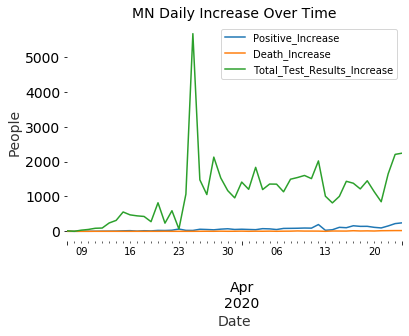

In [5]:

date_positive_df.plot()
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.rc('font',family='Helvetica',size=10) # work in standard sans-serif
plt.rc('mathtext',fontset='stixsans')     # with math from www.stixfonts.org

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
plt.title("MN Daily Increase Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14, alpha=0.8)
plt.ylabel("People", fontsize=14, alpha=0.8)

#marker_style = dict(color='tab:blue', linestyle=':', marker='o',
#                    markersize=1, markerfacecoloralt='tab:red') **marker_style

# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
#plt.savefig("Output_Data/COV.png", bbox_inches="tight")  

### For later
Potentially can look deeper at data using rolling standard deviation to show "volitility" of data. The greater the volitility, the less a "trend" can be trusted.

In [6]:
# Save chart to file 
plt.savefig("Images/date_positive_df.png") 
MN_Daily_Increase_Ian=date_positive_df
plt.savefig('Images/MN_Daily_Increase_Ian.png')

# Ian's Code...
#date_positive_df.rolling(5).std()
#Images/

<Figure size 432x288 with 0 Axes>

With it working for MN, bring in other States

## Summary
### Process
Taking data from covidtracking.com api, we generated line charts of daily intervals showing total number of tests vs positive cases and deaths. Currently code is manual to get more States besides MN (accomplished in another notebook, where I hope to generalize and automate process). 
### Interpretation
<p float="left" align="left">
  <img src="Images/MN_Daily_Increase_Line.png" width="250" style="float:left"/>
  <img src="Images/CO_Daily_Increase_Line.png" width="250" style="float:left"/> 
  <img src="Images/MI_Daily_Increase_Line.png" width="250" style="float:left"/>
</p>
</n>




MN and MI appear to have Tests and Positives lines follow each other starting first week of April. It's enough to warrant deeper study into whether this is to be expected or not.

### Further Investigation
Look at volitility closer. Could try to normalize or compress scale of tests to better see trends of positive cases and deaths.